In [ ]:
%pip install pycaret
from pycaret.classification import setup, compare_models, pull
import pandas as pd

df = pd.read_csv("categorized_data.csv") 

clf = setup(df, target="Y", session_id=42, train_size=0.8)

best_model = compare_models()

pull()

Note: you may need to restart the kernel to use updated packages.


,Description,Value
0,Session id,42
1,Target,Y
2,Target type,Multiclass
3,Original data shape,"(227, 14)"
4,Transformed data shape,"(227, 14)"
5,Transformed train set shape,"(181, 14)"
6,Transformed test set shape,"(46, 14)"
7,Numeric features,13
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8787,0.0000,0.3453,0.2984,0.3201,0.0000,0.0000,0.0130
rf,Random Forest Classifier,0.8787,0.1993,0.3453,0.2984,0.3201,0.0000,0.0000,0.1020
et,Extra Trees Classifier,0.8787,0.2562,0.3453,0.2984,0.3201,0.0000,0.0000,0.1020
dummy,Dummy Classifier,0.8787,0.2000,0.3453,0.2984,0.3201,0.0000,0.0000,0.0260
lr,Logistic Regression,0.8731,0.0000,0.3453,0.2984,0.3201,-0.0038,-0.0043,0.9460
knn,K Neighbors Classifier,0.8623,0.2336,0.3345,0.2971,0.3145,-0.0209,-0.0232,0.0410
qda,Quadratic Discriminant Analysis,0.8620,0.0000,0.3398,0.3210,0.3288,0.0576,0.0671,0.0150
lda,Linear Discriminant Analysis,0.8620,0.0000,0.3342,0.2970,0.3144,-0.0156,-0.0177,0.0200
gbc,Gradient Boosting Classifier,0.8342,0.0000,0.3342,0.2972,0.3144,-0.0486,-0.0505,0.2040
svm,SVM - Linear Kernel,0.8234,0.0000,0.4401,0.4176,0.4126,0.0626,0.0637,0.0150


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8787,0.0000,0.3453,0.2984,0.3201,0.0000,0.0000,0.013
rf,Random Forest Classifier,0.8787,0.1993,0.3453,0.2984,0.3201,0.0000,0.0000,0.102
et,Extra Trees Classifier,0.8787,0.2562,0.3453,0.2984,0.3201,0.0000,0.0000,0.102
dummy,Dummy Classifier,0.8787,0.2000,0.3453,0.2984,0.3201,0.0000,0.0000,0.026
lr,Logistic Regression,0.8731,0.0000,0.3453,0.2984,0.3201,-0.0038,-0.0043,0.946
knn,K Neighbors Classifier,0.8623,0.2336,0.3345,0.2971,0.3145,-0.0209,-0.0232,0.041
qda,Quadratic Discriminant Analysis,0.8620,0.0000,0.3398,0.3210,0.3288,0.0576,0.0671,0.015
lda,Linear Discriminant Analysis,0.8620,0.0000,0.3342,0.2970,0.3144,-0.0156,-0.0177,0.020
gbc,Gradient Boosting Classifier,0.8342,0.0000,0.3342,0.2972,0.3144,-0.0486,-0.0505,0.204
svm,SVM - Linear Kernel,0.8234,0.0000,0.4401,0.4176,0.4126,0.0626,0.0637,0.015


In [ ]:

%pip install h2o

import h2o
from h2o.automl import H2OAutoML

h2o.init()

df_h2o = h2o.import_file("categorized_data.csv") 

X = df_h2o.columns[:-1] 
y = "Y"

aml = H2OAutoML(max_models=20, seed=42)
aml.train(x=X, y=y, training_frame=df_h2o)

print(aml.leaderboard)

best_model_h2o = aml.leader


Note: you may need to restart the kernel to use updated packages.
Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "21.0.6" 2025-01-21; OpenJDK Runtime Environment (build 21.0.6+7-Ubuntu-124.04.1); OpenJDK 64-Bit Server VM (build 21.0.6+7-Ubuntu-124.04.1, mixed mode, sharing)
  Starting server from /home/reyhaneh/miniconda3/envs/myenv/lib/python3.11/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpxh76dmvp
  JVM stdout: /tmp/tmpxh76dmvp/h2o_reyhaneh_started_from_python.out
  JVM stderr: /tmp/tmpxh76dmvp/h2o_reyhaneh_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


H2O_cluster_uptime:,04 secs
H2O_cluster_timezone:,Europe/Berlin
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.6
H2O_cluster_version_age:,3 months and 23 days
H2O_cluster_name:,H2O_from_python_reyhaneh_jcou6f
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.869 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |██
14:02:15.85: GBM_1_AutoML_1_20250225_140159 [GBM def_5] failed: water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for GBM model: GBM_1_AutoML_1_20250225_140159.  Details: ERRR on field: _min_rows: The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 181.0.
ERRR on field: _min_rows: The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 181.0.
ERRR on field: _min_rows: The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 182.0.
ERRR on field: _min_rows: The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 182.0.
ERRR on field: _min_rows: The dataset size is too small to split for min_rows=100.0: must hav

In [ ]:
%pip install tpot
from tpot import TPOTClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

df = pd.read_csv("categorized_data.csv")

X = df.drop(columns=["Y"])
y = df["Y"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tpot = TPOTClassifier(generations=5, population_size=20, verbosity=2, random_state=42)
tpot.fit(X_train, y_train)

print(tpot.fitted_pipeline_)

print(tpot.score(X_test, y_test))

  Using cached TPOT-0.12.2-py3-none-any.whl.metadata (2.0 kB)
  Preparing metadata (setup.py) ... done
  Using cached xgboost-2.1.4-py3-none-manylinux_2_28_x86_64.whl.metadata (2.1 kB)
Using cached xgboost-2.1.4-py3-none-manylinux_2_28_x86_64.whl (223.6 MB)
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11986 sha256=e3ffa180c278d752c2dcf129cfd6d979d6ff3b44f38f145f89263be761e022c0
  Stored in directory: /home/reyhaneh/.cache/pip/wheels/da/77/2d/adbc56bc4db95ad80c6d4e71cd69e2d9d122174904342e3f7f
Successfully built stopit
Note: you may need to restart the kernel to use updated packages.


Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8785285285285285

Generation 2 - Current best internal CV score: 0.8785285285285285

Generation 3 - Current best internal CV score: 0.8785285285285285

Generation 4 - Current best internal CV score: 0.8785285285285285

Generation 5 - Current best internal CV score: 0.8785285285285285

Best pipeline: XGBClassifier(input_matrix, learning_rate=0.001, max_depth=9, min_child_weight=7, n_estimators=100, n_jobs=1, subsample=0.45, verbosity=0)
Pipeline(memory=None,
         steps=[('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                

Cross-validation Accuracy Scores: [0.86956522 0.86956522 0.88888889 0.88888889 0.86666667]
Mean Cross-validation Accuracy: 0.8767
Standard Deviation of Cross-validation Accuracy: 0.0100
Accuracy: 0.8767
F1 Score: 0.8190
Precision: 0.7685
Recall: 0.8767
Confusion Matrix:
[[199   0   0]
 [ 23   0   0]
 [  5   0   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93       199
           1       0.00      0.00      0.00        23
           2       0.00      0.00      0.00         5

    accuracy                           0.88       227
   macro avg       0.29      0.33      0.31       227
weighted avg       0.77      0.88      0.82       227



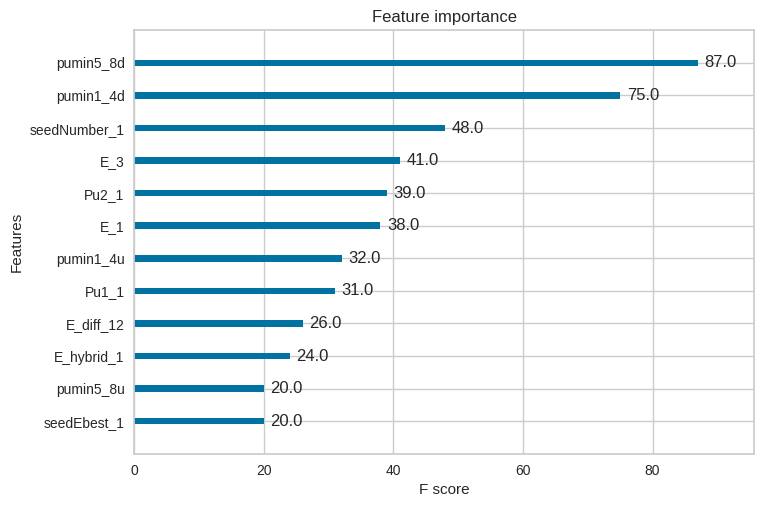

In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report
from xgboost import XGBClassifier

df = pd.read_csv("categorized_data.csv") 

X = df.drop(columns=["Y"])  
y = df["Y"]

model = XGBClassifier(
    learning_rate=0.001,
    max_depth=9,
    min_child_weight=7,
    n_estimators=100,
    subsample=0.45,
    n_jobs=1,
    verbosity=0,
    objective='multi:softprob'
)

cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print(f"Cross-validation Accuracy Scores: {cv_scores}")
print(f"Mean Cross-validation Accuracy: {cv_scores.mean():.4f}")
print(f"Standard Deviation of Cross-validation Accuracy: {cv_scores.std():.4f}")

model.fit(X, y)

y_pred = model.predict(X)
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy: {accuracy:.4f}")

f1 = f1_score(y, y_pred, average='weighted')
print(f"F1 Score: {f1:.4f}")

precision = precision_score(y, y_pred, average='weighted')
print(f"Precision: {precision:.4f}")

recall = recall_score(y, y_pred, average='weighted')
print(f"Recall: {recall:.4f}")

conf_matrix = confusion_matrix(y, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

class_report = classification_report(y, y_pred)
print("Classification Report:")
print(class_report)

results_df = pd.DataFrame({
    'Metric': ['Accuracy', 'F1 Score', 'Precision', 'Recall'],
    'Score': [accuracy, f1, precision, recall]
})
results_df.to_csv('model_results.csv', index=False)

conf_matrix_df = pd.DataFrame(conf_matrix, index=['Actual_0', 'Actual_1', 'Actual_2'], columns=['Predicted_0', 'Predicted_1', 'Predicted_2'])
conf_matrix_df.to_csv('confusion_matrix.csv')

class_report_df = pd.DataFrame(classification_report(y, y_pred, output_dict=True)).transpose()
class_report_df.to_csv('classification_report.csv')

import matplotlib.pyplot as plt
import xgboost as xgb

xgb.plot_importance(model)
plt.savefig('feature_importance.png')
plt.show()
